# Component 1: Spectrogram

## 1. Tohok Earthquake Location Data
We used here the backend **matplotlib nbagg** instead of **matplotlib inline** because'inline' does not support some interactive functions we need later on. __[(1)](https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python)__ __[(2)](https://matplotlib.org/faq/usage_faq.html)__ 

In [1]:
%matplotlib nbagg

In [2]:
#import the libaries we need to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
#from bqplot import pyplot as plt 

from __future__ import print_function
import numpy as np

from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from bqplot import (
    Figure, Map, Mercator, Orthographic, ColorScale, ColorAxis,
    AlbersUSA, topo_load, Tooltip
)


In [3]:
#reads into the location.txt file, provides headers
locations=pd.read_table("data/location.txt",names=["longitude","latitude","default1","default2"],sep="\t")

By viewing the tables in the above step, we found out that the two columns 'default1' and 'default2' are irrelevant for our analysis, so we decided to cut them out.

In [4]:
#drop the irrelevant columns default1, defulat 2
locations.drop(["default1","default2"],inplace=True,axis=1)

The number 0 to 437 corresponds to the **station**, so we define it here:

In [5]:
locations["station"]=np.arange(0,438)

In [6]:
#resetting the index to 'station'
locations.set_index("station", inplace=True)

In [7]:
#A sanity check to see if our index worked, by locating index number 1
locations.loc[1]

longitude   -98.102
latitude     26.938
Name: 1, dtype: float64

## Location of Tohoku earthquake  
### According to NASA's __[Earth Observertory website](https://earthobservatory.nasa.gov/IOTD/view.php?id=49621)__, the Tohoku earthquake struck Japan at "at 38.3 degrees North latitude and 142.4 degrees East longitude". Based on this information, we set the center location of Tohoku accordingly (Longitude, Latitude).

In [8]:
#center point of the tohoku earthquake
tohoku_location=(-142.4,38.3)

In [9]:
locations.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            428, 429, 430, 431, 432, 433, 434, 435, 436, 437],
           dtype='int64', name='station', length=438)

In [10]:
#calculate the distance from tohoku location to each station
from haversine import haversine
locations["distance"]=[haversine(locations.loc[i],tohoku_location) for i in locations.index]

In [11]:
locations.head()

,longitude,latitude,distance
station,,,
0,-98.683,27.065,4882.202882
1,-98.102,26.938,4945.643921
2,-98.068,26.463,4951.013870
3,-117.110,32.889,2836.018544
4,-107.790,32.532,3862.182187


In [12]:
#sort the location by the distances from the center point
locations=locations.sort_values("distance")

In [13]:
locations.index

Int64Index([211, 193, 228, 244, 194, 288, 257, 165, 272, 151,
            ...
             63,  50, 121, 359, 375, 242, 286, 269, 304, 287],
           dtype='int64', name='station', length=438)

## 2. Tohoku Earthquake time and magnitude data

In [14]:
#read into the time & magnitude file
array_vals=pd.read_csv("data/data_tohoku_norm_transpose.csv",header=None)

### We decided to create a range, for selecting time for 4 hours the frequency is of 1 second each. 

In [15]:
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

# array_vals = array_vals[7000:]

### Normalization 

In [16]:
#normalize magnitude in range [0.1] 
min_val=array_vals.min().min()
max_val=array_vals.max().max()
norm_array_vals=(array_vals-min_val)/(max_val-min_val)

In [17]:
#adds in the location data 
norm_array_vals=norm_array_vals[locations.index]

In [18]:
#checking how the tables look like now 
norm_array_vals.head()

,211,193,228,244,194,288,257,165,272,151,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.623412,0.624967,0.624088,0.623702,0.624130,0.623970,0.623856,0.624079,0.623781,0.623555,...,NaN,0.623797,0.623839,0.623919,0.623819,0.624691,0.623909,0.623900,0.623740,0.623914
00:00:01,0.623189,0.625078,0.623944,0.623781,0.624215,0.624050,0.623844,0.623950,0.623769,0.623483,...,NaN,0.623794,0.623857,0.623972,0.624001,0.624460,0.623894,0.623833,0.623947,0.623843
00:00:02,0.622979,0.625176,0.623804,0.623859,0.624296,0.624127,0.623831,0.623824,0.623758,0.623417,...,NaN,0.623792,0.623876,0.624023,0.624178,0.624231,0.623879,0.623769,0.624148,0.623774
00:00:03,0.622786,0.625260,0.623673,0.623933,0.624369,0.624198,0.623820,0.623705,0.623749,0.623359,...,NaN,0.623791,0.623894,0.624069,0.624344,0.624010,0.623865,0.623709,0.624337,0.623710
00:00:04,0.622615,0.625330,0.623554,0.624003,0.624433,0.624261,0.623811,0.623595,0.623741,0.623309,...,NaN,0.623791,0.623910,0.624111,0.624496,0.623803,0.623852,0.623655,0.624509,0.623652


### Without normalization

In [19]:
array_vals=array_vals[locations.index]

In [20]:
array_vals.columns=np.arange(0,438)

In [21]:
#station number is in numerical order
array_vals.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,-0.001273,0.002861,0.000524,-0.000501,0.000636,0.000211,-0.000090,0.000501,-0.000291,-0.000892,...,NaN,-0.000249,-0.000137,0.000077,-0.000191,0.002128,0.000049,0.000025,-0.000400,0.000063
00:00:01,-0.001865,0.003157,0.000142,-0.000291,0.000863,0.000425,-0.000125,0.000159,-0.000324,-0.001083,...,NaN,-0.000256,-0.000088,0.000217,0.000294,0.001515,0.000009,-0.000152,0.000151,-0.000126
00:00:02,-0.002425,0.003419,-0.000229,-0.000084,0.001077,0.000629,-0.000157,-0.000176,-0.000352,-0.001258,...,NaN,-0.000261,-0.000039,0.000351,0.000764,0.000905,-0.000029,-0.000323,0.000685,-0.000309
00:00:03,-0.002937,0.003642,-0.000577,0.000114,0.001272,0.000818,-0.000186,-0.000493,-0.000377,-0.001414,...,NaN,-0.000263,0.000008,0.000476,0.001206,0.000318,-0.000067,-0.000482,0.001187,-0.000480
00:00:04,-0.003392,0.003827,-0.000895,0.000298,0.001443,0.000985,-0.000212,-0.000787,-0.000397,-0.001546,...,NaN,-0.000263,0.000052,0.000588,0.001610,-0.000232,-0.000103,-0.000627,0.001645,-0.000635


# Replacing the Nan values with the average values.

In [22]:
#norm_array_vals.fillna(0, inplace=True)
avg=norm_array_vals.mean()
norm_array_vals= norm_array_vals.fillna((avg[49]+avg[50] )/2)

In [23]:
#Station numbers are in order by distance to the center location 
#norm_array_vals.head()

In [24]:
#plt.imshow(norm_array_vals.transpose(), aspect = 'auto', cmap = 'jet')

In [25]:
#norm_array_vals.transpose().head()

# for the plt.imshow line - do we use array_vals or norm_array_vals? 

In [26]:
def make_spect():
    fig, ax = plt.subplots(figsize=(6,4))
    plt.imshow(array_vals.transpose(), aspect = 'auto', cmap = 'viridis',vmin=0, vmax=1)
    plt.colorbar(label="Tohoku Earthquake Magnitude")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Detector')
    ax.set_xlim(0,len(array_vals)-1)
    ax.set_ylim(0,437)
    ann = ax.annotate("", xy=(0,0),xytext=(0,15),textcoords="offset points",
                        bbox=dict(boxstyle="square", fc="w"))
    ann.set_visible(False)

    def hover(event):
        if event.inaxes == ax:
            if event.xdata<(ax.get_xlim()[1]-ax.get_xlim()[0])/2:
                ann.xy=(event.xdata+100,event.ydata)  
            else:
                ann.xy=(event.xdata-5000,event.ydata)
            ann.set_text("detector#=%s\ntime=%s\nmagnitude=%s" %(locations.index.values[int(event.ydata)], str(datetime.timedelta(seconds=int(event.xdata))),array_vals[int(event.ydata)][int(event.xdata)]))   
            ann.set_visible(True)
        else:
            ann.set_visible(False)

    fig.canvas.mpl_connect('motion_notify_event', hover)

In [27]:
#make_spect()

Reference:
https://stackoverflow.com/questions/47242637/why-doesnt-imshow-show-pixel-values-when-i-hover-over-it
https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python

  

## Defining the call back function for the interactivity of the map and waveform.

In [28]:
### Get the waveform for a station from the starting to 
### the selected interval 

def wave_form_detect(station, time):
    x = range(0, time)
    y = array_vals.iloc[:time][station]
    return x, y

### Update the wave whenever the time or the station is changed. 

def update_wave(self, target):
    #print(sel_station)
    new_x, new_y = wave_form_detect(scat_plot.selected, slider.value)
    wave.x = new_x
    wave.y = new_y

### Define the color in the linear scale of the stations based on the time. 

def get_col(time): 
    temp = np.array(norm_array_vals.iloc[time].values.flatten())
    c_map = np.log10(np.nan_to_num(temp))
    return c_map

## update the detector colors whenever the time is changed. 
   
def upd_col_lat(change): 
    scat_plot.color=get_col(slider.value)
    #rint(change.new)
    
def upd_wf_title(self, target):
    waveform.title = 'Waveform for station: ' + str(scat_plot.selected) + ' for the time period: ' + str(slider.value)
    
    
def upd_time_wf(change):
    waveform.title = 'Waveform for station: ' + str(scat_plot.selected) + ' for the time period: ' + str(slider.value)

### Create a slider for selecting the time between 0 to 4hrs: 

In [29]:
time = pd.Series(range(0,array_vals[0].size))
#slider = interactive(get_time, interval=(time.min()+1, time.max()+1, 1))
slider =  widgets.IntSlider(min=time.min()+1, max=time.max()+1, value=1, description='Time Period')
display(slider)

IntSlider(value=1, description='Time Period', max=14401, min=1)

In [30]:
### Creating Maps using bqplot

### projecttion for the USA states map. 
sc_geo = AlbersUSA()
sc_geo.scale_factor=1080


states_map = Map(map_data=topo_load('map_data/USStatesMap.json'), scales={'projection': sc_geo},hovered_styles={'hovered_fill':None})

## setting the hover highlight to false: 
states_map.hover_highlight=False

#Figure(marks=[states_map], title='US States Map Example')


In [31]:
## Create the scatter plot of the stations. 
## use the loation of the stations to plot the values. 


## set the x-scale for the scatter plot 
sc_x = LinearScale(min=25, max=50)

## set the y-scale for the scatter plot 
sc_y = LinearScale(min=-115, max=-80)



col_sc = ColorScale()

color = get_col(slider.value)


## Creatinig the scatter plot with the lat and long values of the detectors: 
## Included the "select" interaction with the click event. 

scat_plot = Scatter(x=locations['latitude'] , y=locations['longitude'], 
                scales={'x': sc_x, 'y': sc_y, 'color': col_sc},                
                color=color,
                stroke='black',
                interactions={'click': 'select'},
                selected_style={'opacity': 1.5, 'fill': 'blue', 'stroke': 'white'},
                unselected_style={'opacity': 1.0})

# Define the axes themselves

#axis_x = Axis(scale=sc_x, tick_format='0.1f')
#axis_y = Axis(scale=sc_y, tick_format='0.1f', orientation='vertical')

ax_c = ColorAxis(scale=col_sc, label='Intensity',side='left',tick_format='0.3f')
# The graph itself...
#detector_loc = Figure(marks=[states_map,scat_plot], axes=[axis_x, axis_y,ax_c], title='Detector Location')
detector_loc = Figure(marks=[states_map,scat_plot],axes=[ax_c], title='Detector Location')
detector_loc

Figure(axes=[ColorAxis(label='Intensity', scale=ColorScale(), side='left', tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Map(hover_highlight=False, hovered_styles={'hovered_fill': None}, interactions={'hover': 'tooltip'}, map_data={'type': 'Topology', 'objects': {'land': {'type': 'MultiPolygon', 'properties': {'counties': None}, 'arcs': [[[5830, 6026, 6034, 6073, 6164, 6179, 6023, 6043, 6231, 6416, 6410, 6564, 6243, 6565, 6546, 6475, 6542, 6784, 6741, 6811, 6739, 6870, 6965, 7087, 7246, -7086, 7247, 7255, 7256, 7257, 7305, 7566, 9399, 7668, 9397, -7836, 9398, 7838, 8050, 8017, 8018, 8019, 8020, 8021, 8047, 8023, 8252, 8247, 8302, 8493, 8575, -8491, 8576, 8671, 8807, 8877, 8984, 9074, 9116, 9138, 9129, 9073, 8960, 8874, 8961, 8956, 8957, 9090, 9130, 9181, -9123, 9182, 9125, 9177, 9255, 9278, 9279, 9280, 9311, 9306, 9307, 9308, 9309, 9318, 9340, 9347, 9342, 9343, 9344, 9345, 9349, 9338, 9326, 9317, 9284, 9315, 9286, 9266, 9241, 9239, 9214, 9200, 9170, 9113, 9114, 9350, 8936, 8837, 8937, 9039, 8977, 9038, 8979, 8884, 8980, 8886, 8777, -8768, 8778, 8770, 8761, 8755, 8642, 8643, 8644, 8667, 8810, 8833, 8851, 8819, 8981, 9002, 8999, 9000, 9064, 8974, 9059, -8971, 9053, 9054, 9055, 9056, 9057, 9083, 9044, 9023, 9011, 9034, 8988, 9065, 9108, 9067, 8991, 9107, 9109, 9152, 9193, 9141, 9196, 9143, 9144, 9145, 9156, 9195, 9206, 9226, 9190, 9227, 9208, 9222, 9232, 9225, 9233, 9234, 9235, 9252, 9273, 9303, 9334, 9339, 9331, 9328, 9292, 9231, 9167, 9104, 8944, 8844, 8841, 8854, 8358, 8360, 7864, 8080, 8008, 8177, 8470, 8160, 7700, 7715, 7672, 7495, 7030, 6995, 6876, 6510, 5861, 5585, 5267, 5171, 5264, 5415, 5133, 4992, 4822, 4518, 4663, 4437, 4662, 4439, 4447, 4816, 4449, 3587, 2648, 2337, 1859, 1579, 1433, 1268, 954, 753, 600, 639, 586, 588, 454, 330, 221, 175, 222, 306, 264, 358, 261, 359, 308, 394, 357, 294, 184, 172, 185, 126, 2, 73, 83, 78, 81, 22, 34, 18, 41, 97, 86, 44, 48, 27, 8, 51, 108, 91, 96, 101, 38, 30, 62, 66, 55, 58, 104, 9351, 123, 139, 192, 9352, 191, 134, 9354, 9356, 9357, 541, 465, 421, 9362, 433, 9366, 9368, 472, 9377, 9374, 9375, 9379, 554, 9369, 690, 9370, 854, 855, 856, 1128, 1140, 9371, 1138, 1259, 1443, 1591, 1767, 1926, 1992, 2081, 2199, 2497, 2499, 2431, 2170, 2116, 1954, 1753, 1654, 1502, 1348, 1197, 1085, 9386, 9387, 922, 9382, 9381, 748, 797, 9388, 1048, 1208, 9389, 1403, 1529, 9390, 1546, 9391, 1893, 9392, 9396, 2469, 2470, 2471, 2472, 2473, 2478, 2479, 2480, 2632, 2558, 2599, 2544, 2407, 2365, 2166, 2027, 1797, 1684, 1681, 1689, 1692, 1669, 1538, 1249, 1250, 1251, 993, 1005, 979, 975, 968, 982, 972, 874, 865, 794, 547, 347, 790, 894, 577, 1090, 1252, 1256, 1360, 1258, 1107, 1361, 1350, 1359, 1352, 1506, 1583, 1715, 1900, 2085, 1971, 1972, 1973, 2083, 2132, 2143, 2130, 2139, 2252, 2141, 2213, 2509, 2215, 2416, 2285, 2418, 2517, 2491, 2523, 2525, -2522, 2526, 2511, 2715, 3009, 3060, 3011, 2714, 2592, 2733, 2860, 3079, 3029, 3120, 3220, 3309, 3493, 3483, 3769, 4090, 3909, 3748, 3907, 3751, 3713, 3752, 3715, 3753, 3687, 3629, 3486, 3515, 3546, 3717, 4068, 4359, 4360, 4361, 4754, 5037, 5382, 5036, 4752, 4833, 4656, 4547, 4233, 4375, 4135, 4044, 3788, 3798, 3804, 4054, 4158, -4053, 4159, 4488, 4258, 4579, 4696, 4581, 4260, 4352, 4385, 4467, 4307, 4376, 4635, 4780, 4842, 5041, 5166, 4979, 4841, 4777, 4956, 5203, 5347, 5401, 5349, 5086, 5126, 5306, 5451, 5514, 5635, 5663, 5616, 5450, 5408, 5260, 5371, 5555, 5560, 5604, 5646, 5858, 5854, 5890, 5851, 5802, 5891, 5833, 5804, 5834, 6027, 6244, 6029, 5828, 5829], [-5826, -5827]], [[116]], [[117]], [[118]], [[173]], [[259]], [[291]], [[892]], [[893]], [[9360, 9363]], [[9361]], [[9372]], [[9373]], [[9378]], [[9383]], [[9384]], [[9358]], [[1793]], [[3017, 3084, 3116, 3086, 3019, 2745, 3015, 3016]], [[-3083, 3082, 9861]], [[3201]], [[2595]], [[2690]], [[2508]], [[6873]], [[6874]], [[6994]], [[7027]], [[7028]], [[4132]], [[4828, 4829, 4827]], [[4832, 4830, 4831]], [[6241, 6240]], [[9105]], [[9192, 

In [32]:
get_col(slider.value).max()

-0.20315407123164766

In [37]:
###  SEt the scales for the waveform 

x = LinearScale()
y = LinearScale(min=-1.7, max=1.7)


### create a animation time variable so that the transformation is smooth. 

try:
    ani_time = int(slider.value/10)
except TypeError:
    ani_time = 500


### Create a line plot using the X and Y values. 

wave = Lines(scales={'x': x, 'y': y}, colors=['red'],
               enable_move=False)

ax_x = Axis(scale=x, tick_format='0.f', label = 'Time (seconds)')
ax_y = Axis(scale=y, tick_format='0.3f', label = 'Magnitude', orientation='vertical')

waveform = Figure(marks=[wave], axes=[ax_x, ax_y], 
                title='Waveform:',
                animation_duration=ani_time)

# Calculate the waveform for the station for default values...
initial_station = np.random.randint(0,len(locations))
initial_timeinterval=1500

wave.x, wave.y = wave_form_detect(initial_station, initial_timeinterval)
waveform.title = 'Waveform for station: ' + str(initial_station) + ' for the time period: ' + str(initial_timeinterval)
waveform

Figure(animation_duration=404, axes=[Axis(label='Time (seconds)', scale=LinearScale(), tick_format='0.f'), Axis(label='Magnitude', orientation='vertical', scale=LinearScale(max=1.7, min=-1.7), tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['red'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale(max=1.7, min=-1.7)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([   0,    1,    2, ..., 1497, 1498, 1499]), y=array([  3.17390000e-05,  -2.33710000e-06,  -3.57880000e-05, ...,
        -8.41070000e-02,  -8.41250000e-02,  -8.37690000e-02]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Waveform for station: 94 for the time period: 1500')

In [34]:
### Function calls for the callbacks. 

## The below function updates the wave on 
## selection of the detector. 
scat_plot.on_element_click(update_wave)

## For updating the title with time and station 
scat_plot.on_element_click(upd_wf_title)

## For updating the color of the station based on slider valus 
slider.observe(upd_col_lat, names='value')

## For updating the title of the wavefor  based on slider valus 
slider.observe(upd_time_wf, names='value')

<IPython.core.display.Javascript object>


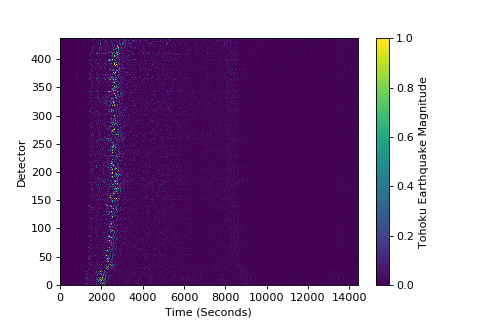

In [35]:
make_spect()

<IPython.core.display.Javascript object>


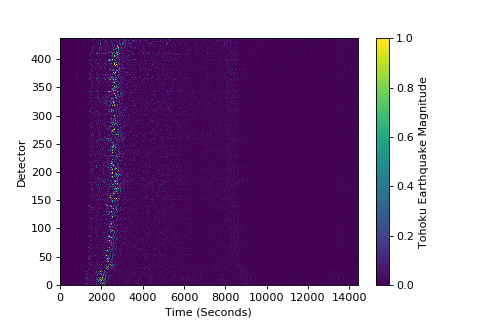

IntSlider(value=4046, description='Time Period', max=14401, min=1)

HBox(children=(Figure(animation_duration=404, axes=[Axis(label='Time (seconds)', scale=LinearScale(), side='bottom', tick_format='0.f'), Axis(label='Magnitude', orientation='vertical', scale=LinearScale(max=1.7, min=-1.7), side='left', tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['red'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale(max=1.7, min=-1.7)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([   0,    1,    2, ..., 4043, 4044, 4045]), y=array([-0.00015493, -0.00017743, -0.00019812, ..., -0.080065  ,
       -0.064065  , -0.048096  ]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Waveform for station: [233] for the time period: 4046'), Figure(axes=[ColorAxis(label='Intensity', orientation='vertical', scale=ColorScale(), side='left', tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Map(hover_highlight=False, hovered_styles={'hovered_fill': None}, interactions={'hover': 'tooltip'}, map_data={'type': 'Topology', 'objects': {'land': {'type': 'MultiPolygon', 'properties': {'counties': None}, 'arcs': [[[5830, 6026, 6034, 6073, 6164, 6179, 6023, 6043, 6231, 6416, 6410, 6564, 6243, 6565, 6546, 6475, 6542, 6784, 6741, 6811, 6739, 6870, 6965, 7087, 7246, -7086, 7247, 7255, 7256, 7257, 7305, 7566, 9399, 7668, 9397, -7836, 9398, 7838, 8050, 8017, 8018, 8019, 8020, 8021, 8047, 8023, 8252, 8247, 8302, 8493, 8575, -8491, 8576, 8671, 8807, 8877, 8984, 9074, 9116, 9138, 9129, 9073, 8960, 8874, 8961, 8956, 8957, 9090, 9130, 9181, -9123, 9182, 9125, 9177, 9255, 9278, 9279, 9280, 9311, 9306, 9307, 9308, 9309, 9318, 9340, 9347, 9342, 9343, 9344, 9345, 9349, 9338, 9326, 9317, 9284, 9315, 9286, 9266, 9241, 9239, 9214, 9200, 9170, 9113, 9114, 9350, 8936, 8837, 8937, 9039, 8977, 9038, 8979, 8884, 8980, 8886, 8777, -8768, 8778, 8770, 8761, 8755, 8642, 8643, 8644, 8667, 8810, 8833, 8851, 8819, 8981, 9002, 8999, 9000, 9064, 8974, 9059, -8971, 9053, 9054, 9055, 9056, 9057, 9083, 9044, 9023, 9011, 9034, 8988, 9065, 9108, 9067, 8991, 9107, 9109, 9152, 9193, 9141, 9196, 9143, 9144, 9145, 9156, 9195, 9206, 9226, 9190, 9227, 9208, 9222, 9232, 9225, 9233, 9234, 9235, 9252, 9273, 9303, 9334, 9339, 9331, 9328, 9292, 9231, 9167, 9104, 8944, 8844, 8841, 8854, 8358, 8360, 7864, 8080, 8008, 8177, 8470, 8160, 7700, 7715, 7672, 7495, 7030, 6995, 6876, 6510, 5861, 5585, 5267, 5171, 5264, 5415, 5133, 4992, 4822, 4518, 4663, 4437, 4662, 4439, 4447, 4816, 4449, 3587, 2648, 2337, 1859, 1579, 1433, 1268, 954, 753, 600, 639, 586, 588, 454, 330, 221, 175, 222, 306, 264, 358, 261, 359, 308, 394, 357, 294, 184, 172, 185, 126, 2, 73, 83, 78, 81, 22, 34, 18, 41, 97, 86, 44, 48, 27, 8, 51, 108, 91, 96, 101, 38, 30, 62, 66, 55, 58, 104, 9351, 123, 139, 192, 9352, 191, 134, 9354, 9356, 9357, 541, 465, 421, 9362, 433, 9366, 9368, 472, 9377, 9374, 9375, 9379, 554, 9369, 690, 9370, 854, 855, 856, 1128, 1140, 9371, 1138, 1259, 1443, 1591, 1767, 1926, 1992, 2081, 2199, 2497, 2499, 2431, 2170, 2116, 1954, 1753, 1654, 1502, 1348, 1197, 1085, 9386, 9387, 922, 9382, 9381, 748, 797, 9388, 1048, 1208, 9389, 1403, 1529, 9390, 1546, 9391, 1893, 9392, 9396, 2469, 2470, 2471, 2472, 2473, 2478, 2479, 2480, 2632, 2558, 2599, 2544, 2407, 2365, 2166, 2027, 1797, 1684, 1681, 1689, 1692, 1669, 1538, 1249, 1250, 1251, 993, 1005, 979, 975, 968, 982, 972, 874, 865, 794, 547, 347, 790, 894, 577, 1090, 1252, 1256, 1360, 1258, 1107, 1361, 1350, 1359, 1352, 1506, 1583, 1715, 1900, 2085, 1971, 1972, 1973, 2083, 2132, 2143, 2130, 2139, 2252, 2141, 2213, 2509, 2215, 2416, 2285, 2418, 2517, 2491, 2523, 2525, -2522, 2526, 2511, 2715, 3009, 3060, 3011, 2714, 2592, 2733, 2860, 307

In [38]:
## Plot the spectogram 
make_spect()

## display the sliders 
display(slider)

## make waveform and detector plot side by side 
plots = widgets.HBox(children=[waveform,detector_loc])

## display the plots 
plots